<div>
<img src="logo.jpg", width=300, ALIGN="left">
<center>
<h1>Mini Projets 2019 (Info 232)</h1>
Isabelle Guyon <br>
info232@chalearn.org <br>
</center>
<span style="color:red"> <h1> 2. Apprentissage </h1> </span>

<br>This code was tested with <br>
Python 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) (https://anaconda.org/)<br>
<i> Adapted for Chalab by Isabelle Guyon from original code of Balázs Kégl</i> <br>
<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
</center>
    
<br> <b>Save your notebook often with menu File + Save and Checkpoint.</b>
<br> <b>Before you push your homework to your GitHub repo, use  Kernel + Restart and Run all.</b> 
</div>
</div>

<div style="background:#FFFFAA">
    <h2>Introduction </h2>
    <p>
     <br>
Cette semaine, nous continuons a etudier le dataset Iris du <a href="http://archive.ics.uci.edu/ml/datasets/Iris">UCI Machine Learning Repository</a>.
        <br> Votre but est de faire une soumission sur la <a href="https://codalab.lri.fr/competitions/204">competition Iris de Codalab</a>.
        Votre travail de la semaine derniere vous a permis d'etre embauche a Super Flora, une companie de distribution de fleurs. Votre tache est de controler automatiquement des lots de fleurs en les classant en <b>3 categories (virginica, setosa, et versicolor)</b>, en vous basant sur 4 variables: <b>la longueur et la largeur des petales et des sepales</b>.
    <p> Ce Jupyter notebook est tres semblable au <b>"starting kit"</b> du challenge Iris, mais nous avons rajoute quelques questions pour vous guider.
 <br>
</div>

In [1]:
model_dir = 'sample_code_submission/'      
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Comment the next lines to avoid auto-reload libraries if this causes problem with pickles in Python 3
%load_ext autoreload
%autoreload 2
from checker import check
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

<div style="background:#FFFFAA">
    <h1> Step 1: Visualization </h1>
<p>
If you did not do the first TP, we strongly encourage you to do it. The first step of all data analyses is always to visualize data to understand it. Here is a subset of the visualizations you did last week.
    <br>
All challenge starting kits come with "sample_data": this usually a very small subset of the training data, split in the same way the entire dataset is split: a training set and two test sets (called "valid" and "test"). This allows you to test your code end-to-end.
    <br>
    Once you have tested everything, you can <b> substitute the "sample_data" with the "public_data" </b>: this is the entire dataset, except for the labels of the test sets.
</div>

In [2]:
data_dir = 'public_data'              # Change this to the directory where you put the public input data
data_name = 'iris'
!ls $data_dir*

iris_feat.name	 iris_public.info  iris_train.data	iris_valid.data
iris_label.name  iris_test.data    iris_train.solution


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [3]:
from data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame

Reading public_data/iris_train from AutoML format
Number of examples = 105
Number of features = 4
        Class
0      setosa
1  versicolor
2   virginica
Number of classes = 3


In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.4,3.0,1.3,0.2,setosa
1,4.7,3.2,1.6,0.2,setosa
2,6.1,2.6,5.6,1.4,virginica
3,6.4,3.1,5.5,1.8,virginica
4,5.8,4.0,1.2,0.2,setosa


In [5]:
#DataStats
data.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.774286,3.063810,3.596190,1.130476
std,0.795423,0.472132,1.781201,0.763484
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


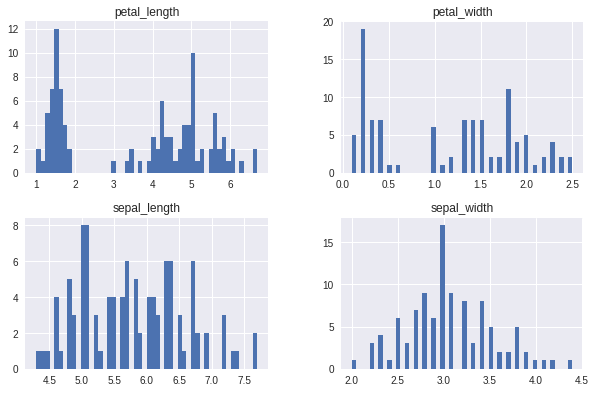

In [6]:
#DataHist
data.hist(figsize=(10, 10), bins=50, layout=(3, 2));

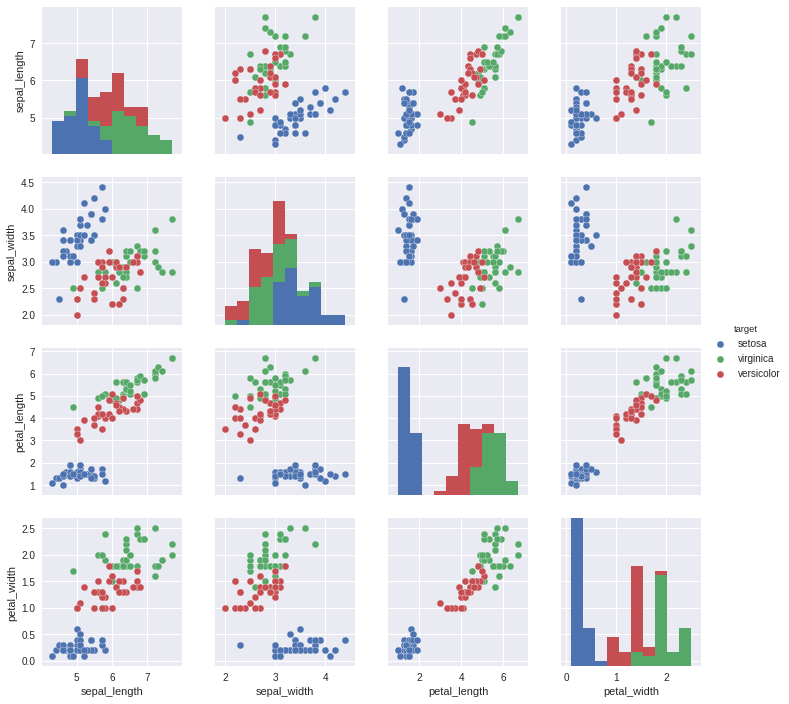

In [7]:
#ShowScatter
sns.pairplot(data, hue="target")

# Question 1: Public data
Apres avoir remplace data_dir par la directory "public_data", qu'obtenez-vous?

In [8]:
feature_number = 4              # put correct value
training_sample_number = 105   # put correct value
validation_sample_number = 15  # put correct value
test_sample_number = 30        # put correct value
std_sepal_length = 0.795423    # Standard deviation of the sepal length, put correct value
mean_sepal_width = 3.063810    # Mean of the sepal width, put correct value
min_petal_length = 1.00000    # Minimum value of the petal length, put correct value
max_petal_width = 2.5    # Maximum value of the petal width, put correct value
question = 1
reponse = feature_number+training_sample_number+validation_sample_number+test_sample_number
reponse += std_sepal_length+mean_sepal_width+min_petal_length+max_petal_width
score = 0
score += check(reponse, question)

<div style="background:#FFFFAA">
    <h2>Loading data with DataManager</h2>
    <p>
We reload the data with the AutoML DataManager class because this will be more convenient for later use: we get a class that respects the AutoML format. <span style="color:red">  One of the tasks of the <b> DATA VISUALIZATION BINOME </b> in your team will be to derive a class from DataManager to visualize data. </span>
</div>

In [9]:
from data_manager import DataManager
D = DataManager(data_name, data_dir)
print(D)

DataManager : iris
info:
	usage = Test
	name = iris
	task = multiclass.classification
	metric = bac_multiclass
	feat_type = Numerical
	feat_num = 4
	target_num = 1
	label_num = 3
	train_num = 105
	valid_num = 15
	test_num = 30
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	time_budget = 600
	format = dense
data:
	X_train = array(105, 4)
	Y_train = array(105,)
	X_valid = array(15, 4)
	Y_valid = array(0,)
	X_test = array(30, 4)
	Y_test = array(0,)
feat_type:	array(4,)
feat_idx:	array(0,)



<div style="background:#FFFFAA">
    <h2>Modifying the DataManager</h2>
    <p>
We provide in the directory "my_code/" sample code that you can modify, including a new DataManager object, derived from the original one. It contains a method that converts data to data frames, and, after that, allows you to call all sorts of methods to visualize data. You can keep expanding it using ideas from TP1 (heatmaps, correlation matrices, etc.)</span>
</div>

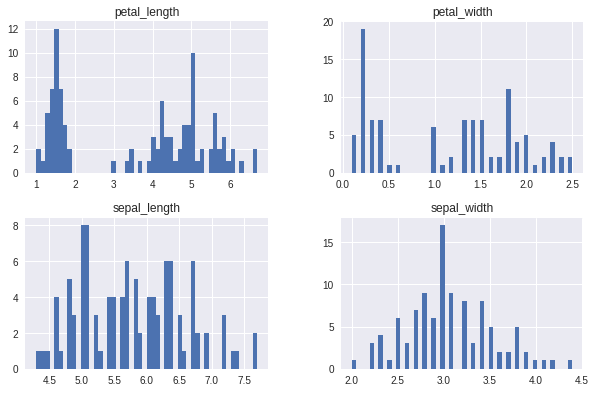

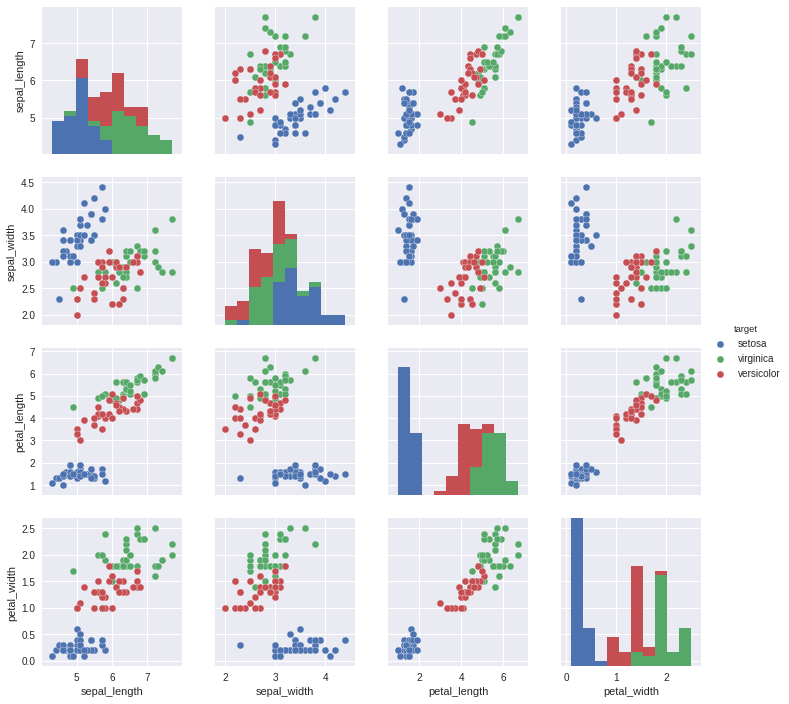

In [10]:
my_code_dir = 'my_code/'       # Change the model to a better one once you have one!
path.append(my_code_dir); 
from zDataManager import DataManager
D = DataManager(data_name, data_dir)
#print(D)
set_name = 'train'             # Make sure your code works for "train", "valid", and "test"
hh = D.DataHist(set_name)
ss = D.ShowScatter(set_name)
dd = D.DataStats(set_name)

# Question 2: Custom Data Manager
Modifiez zDataManager (in my_code/) pour que les methodes DataHist, ShowScatter, et DataStats remplissent les fonctions desiree. Vous utiliserez les methodes des Pandas dataframes de la question precedente et vous retournerez l'objet correspondant.

Idee 1: Ouvrez zDataManager.py dans un editeur.
Idee 2: Utilisez "Control F" pour chercher DataHist, ShowScatter, et DataStats dans zDataManager et dans ce note book.

In [11]:
question = 2
reponse = len(hh.__class__.__name__+ss.__class__.__name__+dd.__class__.__name__)
score += check(reponse, question)

<div style="background:#FFFFAA">
<h1>Step 2: Building a predictive model</h1>
</div>

<div style="background:#FFFFAA">
    <h2>Training a predictive model</h2>
    <p>
We provide in "sample_code_submission/" an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Locate the file "model.py" and replace the code with that of the oneR model of TP1.
        <br>
        <span style="color:red"> The role of the <b>PREDICTION BINOME</b> will be to create a good "model.py" </span>
    </div>

In [12]:
from data_io import write
from model import model
# Uncomment the next line to show the code of the model
#??model

<div style="background:#FFFFAA">
Create an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
    
</div>

In [13]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#M = M.load(trained_model_name)                  

<div style="background:#FFFFAA">
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [14]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
if not(M.is_trained):     
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

Feature selected = 3


<div style="background:#FFFFAA">
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [15]:
M.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/iris_test.predict
sample_result_submission/iris_train.predict
sample_result_submission/iris_valid.predict


<div style="background:#FFFFAA">
    <h2>Scoring the results</h2>
    <h3>Load the challenge metric</h3>
    <p>
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.
    </div>

In [16]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
??scoring_function

Using scoring metric: accuracy_score


<div style="background:#FFFFAA">
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

In [17]:
training_score = scoring_function(Y_train, Y_hat_train)
print('Training score for the', metric_name, 'metric = %5.4f' % training_score)
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the accuracy_score metric = 0.9429
Ideal score for the accuracy_score metric = 1.0000


<div style="background:#FFFFAA">
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [18]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
cv_score = scores.mean()
cv_ebar = scores.std() * 2
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (cv_score, cv_ebar))

Feature selected = 3
Feature selected = 2
Feature selected = 3
Feature selected = 2
Feature selected = 2

CV score (95 perc. CI): 0.92 (+/- 0.08)


# Question 3: Custom classifier
Replacez la methode de classification de model.py dans sample_code_submission/ par le classifieur oneR du TP precedent. Refaites tourner l'apprentissage et l'evaluation ci-dessus. <br> <b> Attention: sauvegardez l'exemple original de model.py, on ne sais jamais...</b>

In [19]:
question = 3
reponse = training_score+cv_score+cv_ebar
score += check(reponse, question)

<div style="background:#FFFFAA">
    <h2>Preprocessing and model selection</h2>
    <p>
You will probably try a lot of models and combinations of preprocessing and models during your project. 
        <br>
        <span style="color:red"> The role of the <b>PREPROCESSING BINOME</b> will be to experiment with various kinds of preprocessings: feature space reduction and/or augmentation.</span> The VISUALIZATION, PREPROCESSING, and PREDICTION binomes will have to collaborate to combine and compare methods.
    </div>

# Question 4: Preprocessing
We provide in the directory "my_code/" an example of preprocessing class called zPreprocessor. It performs Principal Component Analysis to reduce dimensions to two components.
<br>
In the cell below, copy the code snippet that transforms the instance D of the zDataManager object you created into a new instance obtained after PCA and apply the ShowScatter method to display the scatter plot of the training set.

In [20]:
from sys import argv
import warnings
import numpy as np

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    from sklearn.base import BaseEstimator
    from zDataManager import DataManager # The class provided by binome 1
    # Note: if zDataManager is not ready, use the mother class DataManager
    from sklearn.decomposition import PCA

class Preprocessor(BaseEstimator):
    def __init__(self):
        self.transformer = PCA(n_components=2)

    def fit(self, X, y=None):
        return self.transformer.fit(X, y)

    def fit_transform(self, X, y=None):
        return self.transformer.fit_transform(X)

    def transform(self, X, y=None):
        return self.transformer.transform(X)
    
if __name__=="__main__":
    # We can use this to run this file as a script and test the Preprocessor
    if len(argv)==1: # Use the default input and output directories if no arguments are provided
        input_dir = "../public_data"
        output_dir = "../results"
    else:
        input_dir = argv[1]
        output_dir = argv[2];
    
    basename = 'Iris'
    #D = DataManager(basename, input_dir) # Load data
    print("*** Original data ***")
    print(D)
    
    Prepro = Preprocessor()
 
    # Preprocess on the data and load it back into D
    D.data['X_train'] = Prepro.fit_transform(D.data['X_train'], D.data['Y_train'])
    D.data['X_valid'] = Prepro.transform(D.data['X_valid'])
    D.data['X_test'] = Prepro.transform(D.data['X_test'])
    D.feat_name = np.array(['PC1', 'PC2'])
    D.feat_type = np.array(['Numeric', 'Numeric'])
  
    # Here show something that proves that the preprocessing worked fine
    print("*** Transformed data ***")
    print(D)
    

*** Original data ***
DataManager : iris
info:
	usage = Test
	name = iris
	task = multiclass.classification
	metric = bac_multiclass
	feat_type = Numerical
	feat_num = 4
	target_num = 1
	label_num = 3
	train_num = 105
	valid_num = 15
	test_num = 30
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	time_budget = 600
	format = dense
data:
	X_train = array(105, 4)
	Y_train = array(105,)
	X_valid = array(15, 4)
	Y_valid = array(0,)
	X_test = array(30, 4)
	Y_test = array(0,)
feat_type:	array(4,)
feat_idx:	array(0,)
feat_name:	array(4,)
label_name:	array(3,)

*** Transformed data ***
DataManager : iris
info:
	usage = Test
	name = iris
	task = multiclass.classification
	metric = bac_multiclass
	feat_type = Numerical
	feat_num = 4
	target_num = 1
	label_num = 3
	train_num = 105
	valid_num = 15
	test_num = 30
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	time_budget = 600
	format = dense
data:
	X_train = array(105, 2)
	Y_train = array(105,)
	X_valid = array(15, 2)
	Y_valid = array(0

Feature selected = 0


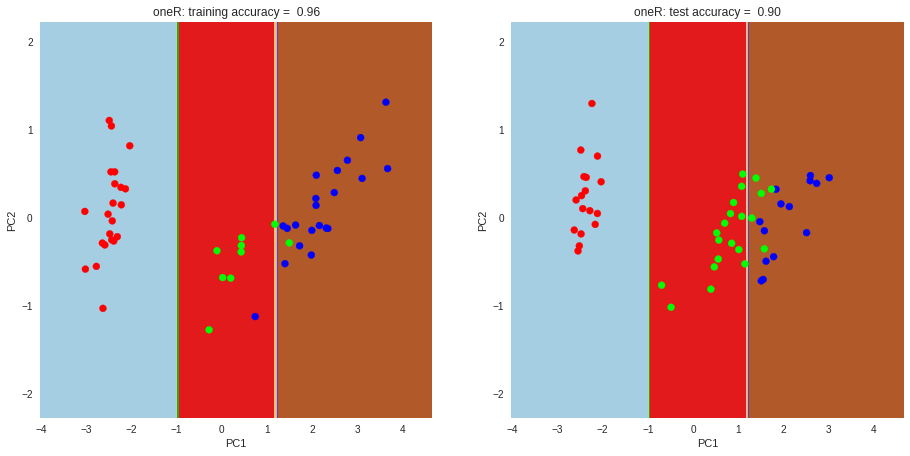

In [21]:
question = 4
reponse = D.ClfScatter(M, dim1=0, dim2=1, title='oneR')
score += check(reponse, question)

C'est important de visualiser les resultats. Ici nous utilisons les scatter plots dans l'espace des deux premieres composantes principales. Pensez aussi a la <a href="http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html">matrice de confusion</a> et pour les problemes de classification binaire aux <a href="http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html">courbes ROC</a>.

# Question 5: Model selection
Vous allez devoir experimenter avec plusieurs modeles et combiner divers preprocessings. Une facon bien pratique de proceder est d'utiliser les <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipelines</a> de scikit-learn. D'autre part on a souvent de meilleures performances en faisant <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html">voter plusieurs classifieurs</a>.
<br> Pour comprendre ce qui se passe, c'est important de visualiser les resultats. Modifiez le code de la fonction test() dans zClassifier.py qui se trouve dans my_code/ en remplaçant la fonction `compute_accuracy` par un appel de ClfScatter pour chaque classifieur que l'on teste.

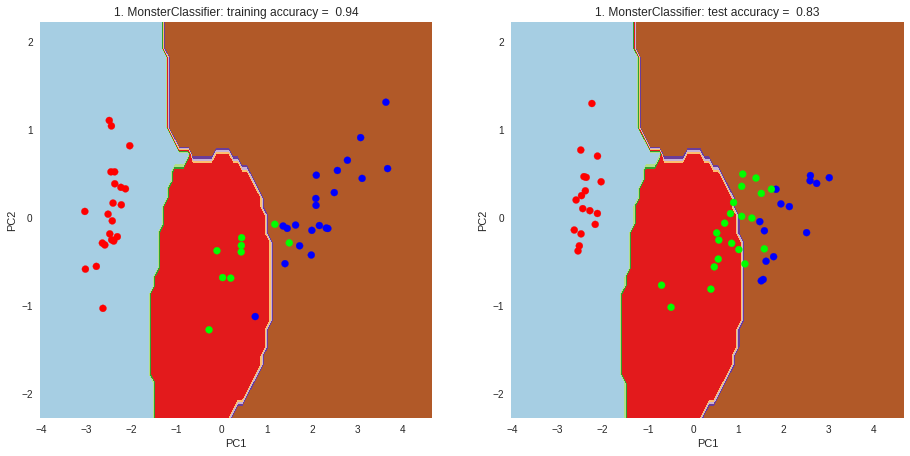

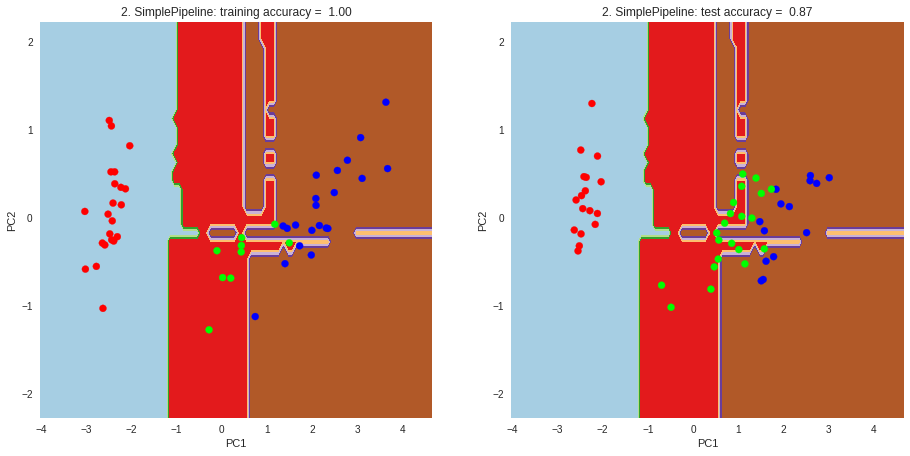

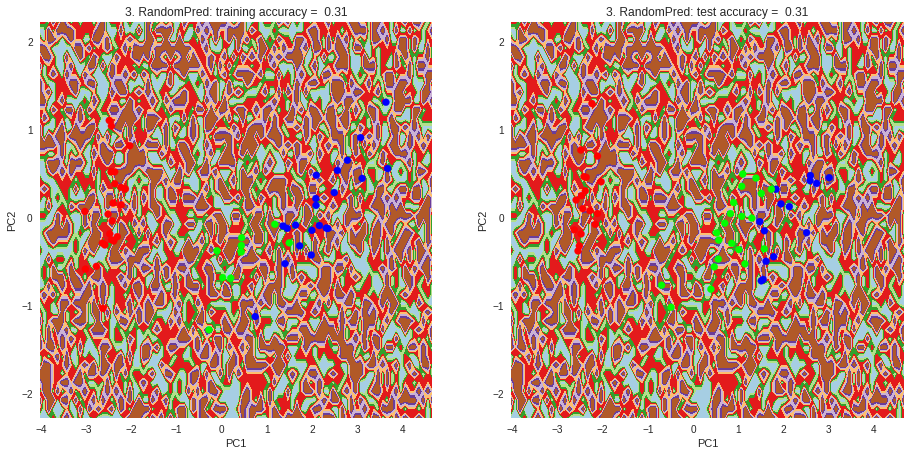

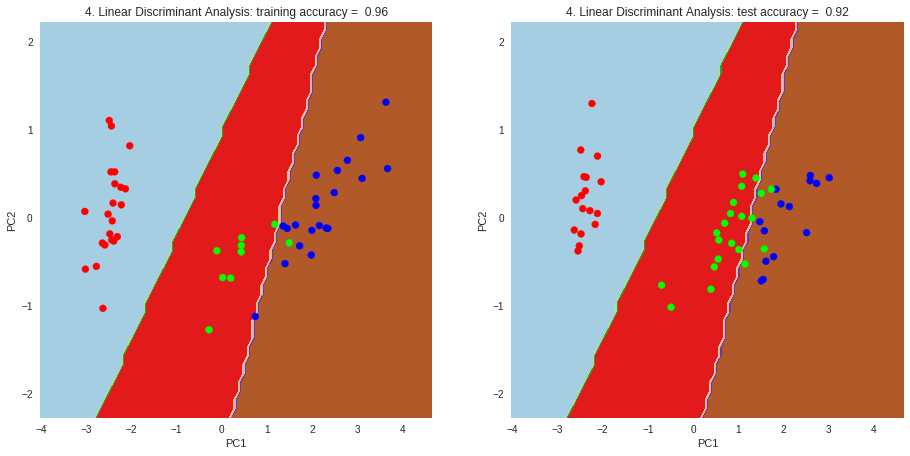

In [22]:
from zClassifier import test
acc=test(D)

In [23]:
question = 5
reponse = 2 # Indiquez le numero du classifieur qui overfitte le plus
score += check(reponse+acc, question) 

In [24]:
print('Your final score is %d / 5, congratulations!' % score)

Your final score is 5 / 5, congratulations!


<div style="background:#FFFFAA">
<h1> Step 3: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [41]:
!python3 $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using input_dir: /home/tp-home003/lamrane/projects/info232/TP2/public_data
Using output_dir: /home/tp-home003/lamrane/projects/info232/TP2/sample_result_submission
Using program_dir: /home/tp-home003/lamrane/projects/info232/TP2/ingestion_program
Using submission_dir: /home/tp-home003/lamrane/projects/info232/TP2/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Iris ********
************************************************
========= Reading and converting data ==========
Info file found : /home/tp-home003/lamrane/projects/info232/TP2/public_data/iris_public.info
========= Reading /home/tp-home003/lamrane/projects/info232/TP2/public_data/iris_feat.type
[+] Success in  0.00 sec
========= Reading /home/tp-home003/lamrane/projects/info232/TP2/public_data/iris_train.data
Replace missing values by 0 (slow, sorry)
[+] Success in  0.00 sec
========= Reading /home/tp-home003/lamrane/projects/i

<div style="background:#FFFFAA">
Also test the scoring program:
    </div>

In [27]:
scoring_output_dir = 'scoring_output'
!python3 $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Iris_train): accuracy_score(set1_score)=0.942857142857 =======


<div style="background:#FFFFAA">
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.</div>

In [42]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_19-02-08-09-58.zip
../sample_result_submission_19-02-08-09-58.zip
